<a href="https://colab.research.google.com/github/jiao-xx/travel-dating-analysis/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Standard Libraries
import re
import sqlite3

# Third-Party Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Google Colab-specific
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/data

[Errno 2] No such file or directory: 'drive/MyDrive/data'
/content/drive/MyDrive/data


In [ ]:
df_ce = pd.read_csv('cleaned_data.csv')
pd.set_option('display.max_columns', None)
df_ce.head()

,userid,used_tinder_during_travels,year_of_most_recent_trip_using_tinder,country_spent_most_time,purpose_of_trip_selected_choice,purpose_of_trip_other_text,number_of_persons_on_trip,who_went_on_trip_selected_choice,who_went_on_trip_organized_group_text,who_went_on_trip_other_text,current_tinder_gold_or_plus_subscriber,type_of_subscription,to_meet_other_travelers,to_meet_locals,to_find_party_companions,to_pass_time,to_make_new_friends,get_accommodation_suggestions_from_locals,get_accommodation_suggestions_from_travelers,get_dining_suggestions_from_locals,get_dining_suggestions_from_travelers,get_activity_suggestions_from_locals,get_activity_suggestions_from_travelers,get_tourist_attraction_suggestions_from_locals,get_tourist_attraction_suggestions_from_travelers,to_find_serious_relationship,to_fall_in_love,to_build_emotional_connection,to_find_one_night_stand,to_increase_sexual_experience,to_enhance_travel_experience,to_make_trip_fun,to_learn_about_destination,to_broaden_experience_at_destination,to_have_satisfying_trip,often_feel_inferior,feel_like_going_to_pieces_when_stressed,often_feel_tense,sometimes_feel_worthless,feel_like_giving_up_when_things_go_wrong,enjoy_talking_to_people,feel_bursting_with_energy,cheerful_high_spirited_person,very_active_person,intrigued_by_art_and_nature,try_new_foreign_foods,little_interest_in_universe_or_human_condition,have_intellectual_curiosity,enjoy_playing_with_theories,get_into_arguments_with_family_or_coworkers,seen_as_selfish_or_egotistical,seen_as_cold_and_calculating,generally_thoughtful_and_considerate,keep_belongings_neat_and_clean,good_at_pacing_to_get_things_done,waste_time_before_settling_to_work,sometimes_not_dependable_or_reliable,never_able_to_get_organized,frequent_binge_drinking,going_camping_in_wild,going_on_safari_in_kenya,going_on_vacation_without_booking_accommodation,traveling_on_commercial_airplane,engaging_in_unprotected_sex,never_using_sunscreen_when_sunbathing,never_wearing_seatbelt,not_having_smoke_alarm,engaging_in_dangerous_sport,primary_residence_in_us_or_canada,zip_or_postal_code_of_primary_residence,country_of_primary_residence,state_or_province_of_primary_residence,sex,age_on_most_recent_birthday,optional_comments_about_tinder_use_during_travels,topics,Regions
0,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,3.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,4.0,4.0,1.0,1.0,2.0,2.0,5.0,3.0,5.0,1.0,5.0,2.0,1.0,1.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0,1.0,False,NaN,JAPAN,NaN,F,23.0,NaN,NaN,East Asia and Pacific
1,1,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,3.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,4.0,2.0,1.0,4.0,1.0,3.0,4.0,1.0,2.0,1.0,4.0,2.0,False,NaN,CHINA,GUANGDONG,M,22.0,NaN,NaN,East Asia and Pacific
2,2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,3.0,5.0,3.0,4.0,3.0,2.0,4.0,4.0,2.0,5.0,3.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,1.0,4.0,1.0,1.0,5.0,1.0,1.0,1.0,3.0,1.0,True,96793,NaN,NaN,M,25.0,"IT’S A DOUBLE EDGED SWORD, FOR WHOEVER YOU’LL ...",NaN,North America
3,3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,3.0,2.0,1.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,3.0,2.0,3.0,1.0,1.0,4.0,3.0,3.0,4.0,3.0,2.0,1.0,4.0,5.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,True,96792,NaN,NaN,F,25.0,NaN,NaN,North America
4,4,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,3.0,1.0,1.0,4.0,3.0,4.0,3.0,4.0,4.0,1.0,5.0,5.0,1.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,1.0,3.0,3.0,3.0,5.0,1.0,1.0,4.0,1.0,1.0,True,11367,NaN,NaN,M,24.0,I'VE NEVER CONSIDERED USING TINDER UNDER ANY C...,NaN,North America


In [ ]:
df_ce.shape

(824, 77)

# Exploratory Data Analysis

## 1. User Demographics Analysis


### **Age Distribution:**

Analyze the age distribution of travelers who use dating apps versus those who don't.

In [ ]:
# Replacing the value 271 with 27 in the "age_on_most_recent_birthday" column
df_ce['age_on_most_recent_birthday'].replace(271, 27, inplace=True)

# Create a connection to a SQLite database in memory
conn = sqlite3.connect(":memory:")

# Copy the DataFrame to the SQL database
df_ce.to_sql('df_ce', conn, index=False)

# Write the query
query = """
SELECT
    MIN(age_on_most_recent_birthday) AS age_min,
    MAX(age_on_most_recent_birthday) AS age_max,
    AVG(age_on_most_recent_birthday) AS age_mean
FROM df_ce
"""

# Execute the query, passing the total count as a parameter
result = pd.read_sql(query, conn)

# Display the result
result


,age_min,age_max,age_mean
0,18.0,69.0,25.362047


In [ ]:
# Create a connection to a SQLite database in memory
conn = sqlite3.connect(":memory:")

# Copy the DataFrame to the SQL database
df_ce.to_sql('df_ce', conn, index=False)

# Write the query
query = """

SELECT
(COUNT(*) * 100.0) / (SELECT COUNT(*) FROM df_ce) AS age_under_30_percentage
FROM df_ce
WHERE age_on_most_recent_birthday < 30

"""

# Execute the query, passing the total count as a parameter
result = pd.read_sql(query, conn)

# Display the result
result


,age_under_30_percentage
0,83.252427


In [ ]:
# Replacing the value 271 with 27 in the "age_on_most_recent_birthday" column
df_ce['age_on_most_recent_birthday'].replace(271, 27, inplace=True)

# Create a connection to a SQLite database in memory
conn = sqlite3.connect(":memory:")

# Copy the DataFrame to the SQL database
df_ce.to_sql('df_ce', conn, index=False)

# Write the query
query = """
SELECT age_on_most_recent_birthday,
       COUNT(*) AS number_of_users
FROM df_ce
GROUP BY age_on_most_recent_birthday;
"""

# Execute the query, passing the total count as a parameter
result = pd.read_sql(query, conn)

# Display the result
result


,age_on_most_recent_birthday,number_of_users
0,NaN,23
1,18.0,14
2,19.0,22
3,20.0,60
4,21.0,81
5,22.0,95
6,23.0,86
7,24.0,83
8,25.0,82
9,26.0,62


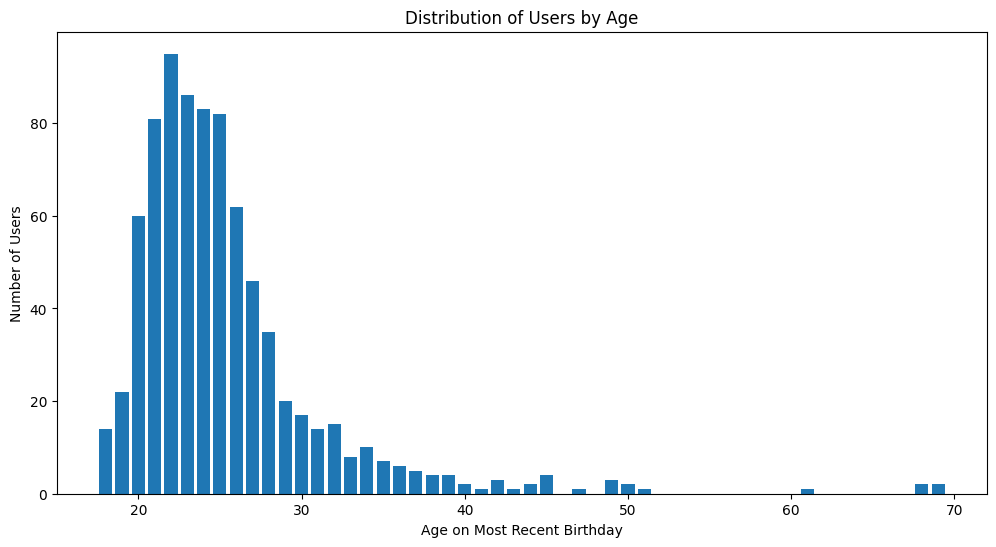

In [ ]:
# Group the data by age_on_most_recent_birthday and count the number of users
result = df_ce.groupby('age_on_most_recent_birthday').size().reset_index(name='number_of_users')

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(result['age_on_most_recent_birthday'], result['number_of_users'])
plt.xlabel('Age on Most Recent Birthday')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Age')
plt.show()



### **Gender Analysis:**
Break down the usage of dating apps by gender to identify any trends or preferences.

In [ ]:
# Create a connection to a SQLite database in memory
conn = sqlite3.connect(":memory:")

# Copy the DataFrame to the SQL database
df_ce.to_sql('df_ce', conn, index=False)

# Write the query
query = """
with cte as (
  SELECT CASE
         WHEN sex = 'F' THEN 'Female'
         WHEN sex = 'M' THEN 'Male'
         ELSE 'NaN'
       END AS sex,
       COUNT(*) AS number_of_users
FROM df_ce
GROUP BY 1
)

SELECT
  sex,
  number_of_users,
  (number_of_users * 100.0) / (SELECT SUM(number_of_users) FROM cte) AS percentage
FROM cte

"""

# Execute the query, passing the total count as a parameter
result = pd.read_sql(query, conn)

# Display the result
result

,sex,number_of_users,percentage
0,Female,408,49.514563
1,Male,397,48.179612
2,NaN,19,2.305825


import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['number_of_users'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['percentage'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['number_of_users'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['percentage'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (8 * figscale, 4.8 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.6):
  from matplotlib import pyplot as plt
  figsize = (len(colname_pairs) * 10 * figscale, 10 * figscale)
  plt.figure(figsize=figsize)
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    # Note: `32*figscale` may be too large; scaling by # of datapoints may be
    # wiser.
    ax.scatter(df[x_colname], df[y_colname], s=(32 * figscale), alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_5, *[[['number_of_users', 'percentage']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_6, *['number_of_users', 'sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_7, *['percentage', 'sex'], **{'inner': 'stick'})
chart

In [ ]:
# Filter the dataset based on 'used_tinder_during_travels' and 'sex' columns
tinder_sex_counts = df_ce.groupby(['used_tinder_during_travels', 'sex']).size().unstack().fillna(0)

# Calculate the total count for each sex
total_sex_counts = tinder_sex_counts.sum(axis=0)

# Calculate percentages
tinder_sex_percentage = tinder_sex_counts.div(total_sex_counts, axis=1) * 100

# Conduct chi-squared test
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(tinder_sex_counts)

tinder_sex_counts, tinder_sex_percentage, chi2, p


(sex                           F    M
 used_tinder_during_travels          
 False                       236  117
 True                        172  280,
 sex                                 F          M
 used_tinder_during_travels                      
 False                       57.843137  29.471033
 True                        42.156863  70.528967,
 64.63616360696227,
 9.008668198254481e-16)

### **Country Analysis:**

Explore the usage of dating apps across different countries or regions to identify potential markets.

### Different Country

In [ ]:

# Create a connection to a SQLite database in memory
conn = sqlite3.connect(":memory:")

# Copy the DataFrame to the SQL database
df_ce.to_sql('df_ce', conn, index=False)

# Write the query
query = """
SELECT
    country_of_primary_residence
    , count(*) as User_num
FROM df_ce
GROUP BY country_of_primary_residence;

"""

# Execute the query, passing the total count as a parameter
result = pd.read_sql(query, conn)

# Display the result
result

,country_of_primary_residence,User_num
0,None,496
1,-,1
2,AUSTRALIA,25
3,AUSTRIA,1
4,BELGIUM,4
5,BRAZIL,3
6,BULGARIA,1
7,CHINA,15
8,CURACAO,1
9,CZECH REPUBLIC,1


### Regional Mapping

In [ ]:
# Filter out necessary columns
filtered_data = df_ce[['Regions', 'used_tinder_during_travels']]

# Calculate percentages for each region for the entire dataset
total_percent = filtered_data['Regions'].value_counts(normalize=True) * 100

# Calculate percentages for each region for those who used the app
used_app_percent = filtered_data[filtered_data['used_tinder_during_travels']]['Regions'].value_counts(normalize=True) * 100

# Calculate percentages for each region for those who did not use the app
not_used_app_percent = filtered_data[~filtered_data['used_tinder_during_travels']]['Regions'].value_counts(normalize=True) * 100

# Create a dataframe to display the results
percentage_df = pd.DataFrame({
    'All in Analysis': total_percent,
    'Used App': used_app_percent,
    'Did not Use App': not_used_app_percent
}).reset_index().rename(columns={'index': 'Region of residence'})

percentage_df


,Region of residence,All in Analysis,Used App,Did not Use App
0,East Asia and Pacific,15.169903,14.596950,15.890411
1,Europe and Central Asia,13.713592,9.150327,19.452055
2,North America,57.645631,64.052288,49.589041
3,Other,11.165049,9.368192,13.424658
4,South Asia,2.305825,2.832244,1.643836


import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(percentage_df, *['All in Analysis'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(percentage_df, *['Used App'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(percentage_df, *['Did not Use App'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(percentage_df, *['All in Analysis'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(percentage_df, *['Used App'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(percentage_df, *['Did not Use App'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (8 * figscale, 4.8 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(percentage_df, *['Region of residence'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.6):
  from matplotlib import pyplot as plt
  figsize = (len(colname_pairs) * 10 * figscale, 10 * figscale)
  plt.figure(figsize=figsize)
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    # Note: `32*figscale` may be too large; scaling by # of datapoints may be
    # wiser.
    ax.scatter(df[x_colname], df[y_colname], s=(32 * figscale), alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(percentage_df, *[[['All in Analysis', 'Used App'], ['Used App', 'Did not Use App']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(percentage_df, *['All in Analysis', 'Region of residence'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(percentage_df, *['Used App', 'Region of residence'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(percentage_df, *['Did not Use App', 'Region of residence'], **{'inner': 'stick'})
chart

#### **USA or Canada**



In [ ]:
# Create a connection to a SQLite database in memory
conn = sqlite3.connect(":memory:")

# Copy the DataFrame to the SQL database
df_ce.to_sql('df_ce', conn, index=False)

# Write the query
query = """
with cte as (
  SELECT CASE
         WHEN primary_residence_in_us_or_canada = 1 THEN 'North_AMerica'
         WHEN primary_residence_in_us_or_canada = 0 THEN 'International'
         ELSE 'NaN'
       END AS primary_residence_in_us_or_canada
  , count(*) AS number_of_users
FROM df_ce
GROUP BY 1
)

SELECT
  primary_residence_in_us_or_canada,
  number_of_users,
  (number_of_users * 100.0) / (SELECT SUM(number_of_users) FROM cte) AS percentage
FROM cte


"""

# Execute the query, passing the total count as a parameter
result = pd.read_sql(query, conn)

# Display the result
result


,primary_residence_in_us_or_canada,number_of_users,percentage
0,International,332,40.291262
1,NaN,17,2.063107
2,North_AMerica,475,57.645631


In [ ]:
# Filter rows where zip_or_postal_code_of_primary_residence contains only numbers
pure_number_count = df_ce[df_ce['zip_or_postal_code_of_primary_residence'].astype(str).str.isnumeric()].shape[0]

pure_number_count


421

In [ ]:
# Filter rows where zip_or_postal_code_of_primary_residence contains both numbers and letters
mixed_count = df_ce[df_ce['zip_or_postal_code_of_primary_residence'].astype(str).str.contains(r'[A-Za-z]', na=False) &
                   df_ce['zip_or_postal_code_of_primary_residence'].astype(str).str.contains(r'\d', na=False)].shape[0]

mixed_count


14

## 2. **Travel Behavior Insights**


### **Travel Purpose Analysis:**

Investigate how the purpose of travel (e.g., business, leisure) correlates with dating app usage.

In [ ]:
# Create a connection to a SQLite database in memory
conn = sqlite3.connect(":memory:")

# Copy the DataFrame to the SQL database
df_ce.to_sql('df_ce', conn, index=False)

# Write the query
query = """
SELECT purpose_of_trip_selected_choice
,  COUNT(*) AS number_of_users
FROM df_ce
GROUP BY 1
"""

# Execute the query, passing the total count as a parameter
result = pd.read_sql(query, conn)

# Display the result
result

,purpose_of_trip_selected_choice,number_of_users
0,None,376
1,BUSINESS,95
2,OTHER; PLEASE SPECIFY:,54
3,VACATION,227
4,VISIT FRIENDS / RELATIVES,72


### **Group Travel Analysis:**

Analyze the impact of traveling alone versus with friends or family on dating app usage.

In [ ]:
# Create a connection to a SQLite database in memory
conn = sqlite3.connect(":memory:")

# Copy the DataFrame to the SQL database
df_ce.to_sql('df_ce', conn, index=False)

# Write the query
query = """
SELECT who_went_on_trip_selected_choice,
       COUNT(*) AS number_of_users
FROM df_ce
GROUP BY who_went_on_trip_selected_choice;
"""

# Execute the query, passing the total count as a parameter
result = pd.read_sql(query, conn)

# Display the result
result

,who_went_on_trip_selected_choice,number_of_users
0,None,370
1,ADULT FAMILY MEMBER(S),42
2,"ADULT FAMILY MEMBER(S),CHILD(REN) AGE 10-17",5
3,"ADULT FAMILY MEMBER(S),CHILD(REN) UNDER AGE 10",2
4,"ADULT FAMILY MEMBER(S),CHILD(REN) UNDER AGE 10...",2
5,"ADULT FAMILY MEMBER(S),ORGANIZED GROUP. NAME O...",1
6,"ADULT FAMILY MEMBER(S),OTHER, PLEASE SPECIFY:",1
7,BUSINESS ASSOCIATE(S),25
8,"BUSINESS ASSOCIATE(S),ORGANIZED GROUP. NAME OF...",1
9,CHILD(REN) AGE 10-17,1


## 3. **Dating App Analysis**


### Using Tinder During Travel


In [ ]:

# Create a connection to a SQLite database in memory
conn = sqlite3.connect(":memory:")

# Copy the DataFrame to the SQL database
df_ce.to_sql('df_ce', conn, index=False)

# Write the query
query = """
with cte as (
  SELECT CASE
         WHEN used_tinder_during_travels = TRUE THEN 'USED'
         ELSE 'NOT_USED'
       END AS USAGE
  , count(*) AS number_of_users
FROM df_ce
GROUP BY 1
)

SELECT
  USAGE as used_tinder_during_travels,
  number_of_users,
  (number_of_users * 100.0) / (SELECT SUM(number_of_users) FROM cte) AS percentage
FROM cte
"""

# Execute the query
result = pd.read_sql(query, conn)

result


,used_tinder_during_travels,number_of_users,percentage
0,NOT_USED,365,44.296117
1,USED,459,55.703883


### **Subscription Analysis:**

Examine the subscription status (e.g., Tinder Gold or Plus) and how it relates to travel usage.

In [ ]:
# Create a connection to a SQLite database in memory
conn = sqlite3.connect(":memory:")

# Copy the DataFrame to the SQL database
df_ce.to_sql('df_ce', conn, index=False)

# Write the query
query = """
SELECT type_of_subscription,
       COUNT(*) AS User_num
FROM df_ce
GROUP BY type_of_subscription
"""

# Execute the query, passing the total count as a parameter
result = pd.read_sql(query, conn)

# Display the result
result


,type_of_subscription,User_num
0,None,742
1,NOT SURE,4
2,TINDER GOLD,66
3,TINDER PLUS,12
